# Importing the modules

In [1]:
from sklearn.cluster import KMeans
import tensorflow as tf
import numpy as np
import csv
import math
import matplotlib.pyplot
from itertools import islice
from matplotlib import pyplot as plt
import random
import pandas as pd

# Generating the Training and Target datasets

In [2]:
# TrainingPercent = 80
# ValidationPercent = 10
# TestPercent = 10

# Defining the methods for Training, Testing and Validation methods

# Calling the methods

# Defining the Keras model

In [3]:
# def concatenate(filepath1,filepath2,filepath3,noOfLines):
#     with open(filepath1, 'w',newline='') as myfile:
#         wr = csv.writer(myfile)
#         with open(filepath2, 'r') as fi:
#             reader = csv.reader(fi)
#             writer = csv.writer(fi)
#             dataRows = []
#             for row in islice(reader,1,noOfLines):
#                 #print(len(fi.readlines()))
#                 dataRow=[]
#                 dataRow.append(row[0])
#                 dataRow.append(row[1])
#                 dataRow.append(int(row[2]))
#                 for column in islice(row,0,2):
#                     with open(filepath3, 'r') as fi2:
#                         reader1 = csv.reader(fi2)
#                         for row2 in islice(reader1,1,1028):
#                             for column2 in row2:
#                                  if(column2==column):
#                                     content = list(row2[i] for i in range(2,11))
#                                     for word in content:
#                                         dataRow.append(word)
#                 dataRows.append(dataRow)
#             # wr.writerow(dataRow)
#             #print(dataRows)
#             wr.writerows(dataRows)
#            # print(dataRow)
            
# def subtract(filepath1,filepath2,noOfLines):
#     with open(filepath1, 'w',newline='') as myfile:
#         wr = csv.writer(myfile)
#         with open(filepath2, 'r') as fi:
#             #c=(len(fi.readlines()))
#             reader = csv.reader(fi)
#             writer = csv.writer(fi)
        
#             for row in islice(reader,0,noOfLines):
#                 list=[]
    
#                 list.append(row[0])
#                 list.append(row[1])
#                 list.append(int(row[2]))
#                 for i in range(2,11):
#                     list.append(abs(int(row[i])-int(row[i+9])))
#                 wr.writerow(list)
def concatenate(filepath1,filepath2,filepath3,noOfLines):
    with open(filepath1, 'w',newline='') as myfile:
        wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
        with open(filepath2, 'r') as fi:
            reader = csv.reader(fi)
            writer = csv.writer(fi)
            for row in islice(reader,1,noOfLines):
                #print(len(fi.readlines()))
                dataRow = []
                dataRow.append(row[0])
                dataRow.append(row[1])
                dataRow.append(int(row[2]))
                for column in islice(row,0,2):
                    with open(filepath3, 'r') as fi2:
                        reader1 = csv.reader(fi2)
                        for row2 in islice(reader1,1,14072):
                            for column2 in row2:
                                 if(column2==column):
                                    content = list(row2[i] for i in range(1,513))
                                    for word in content:
                                        dataRow.append(word)
    
                wr.writerow(dataRow)

def subtract(filepath1,filepath2,noOfLines):
    with open(filepath1, 'w',newline='') as myfile:
        wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
        with open(filepath2, 'r') as fi:
            #c=(len(fi.readlines()))
            reader = csv.reader(fi)
            writer = csv.writer(fi)
        
            for row in islice(reader,0,noOfLines):
                list=[]
                list.append(row[0])
                list.append(row[1])
                list.append(int(row[2]))
                for i in range(2,514):
                    list.append(abs(int(row[i])-int(row[i+512])))
                wr.writerow(list)               

def combine_pairs(filepath1,filepath2,filepath3):
    fout=open(filepath1,"w",newline='')
    for line in open(filepath2):
         fout.write(line)
            
    with open(filepath3, "r") as source:
        lines = [line for line in source]
    random_choice = random.sample(lines, 500)
    for l in random_choice:
        fout.write(l)
    fout.close()
    
def shuffled_pairs(filepath1,filepath2):
    
    fid = open(filepath2, "r")
    li = fid.readlines()
    fid.close()
    #print(li)

    random.shuffle(li)
    #print(li)

    fid = open(filepath1, "w",newline='')
    fid.writelines(li)
    fid.close()

def GetTarget(filePath):
    t = []
    with open(filePath, 'rU') as f:
        reader = csv.reader(f)
        for row in reader:  
            t.append(float(row[2]))
        #print("Raw Training Generated..")
    
    return t

def GetRawData(filePath):    
    dataMatrix = [] 
    with open(filePath, 'rU') as fi:
        reader = csv.reader(fi)
        for row in reader:
            dataRow = []
            for column in row[3:]:
                dataRow.append(float(column))
            dataMatrix.append(dataRow)   
    
    
    #dataMatrix = np.delete(dataMatrix, [0,1,2], axis=1)
    dataMatrix = np.transpose(dataMatrix)     
    
    
    return dataMatrix




#Generating training target from raw target by restricting the length of the training target to only 80% of whole raw target.
def GenerateTrainingTarget(rawTraining,TrainingPercent):
    TrainingLen = int(math.ceil(len(rawTraining)*(TrainingPercent*0.01)))
    #From the beginning to the calculated training length
    t           = rawTraining[:TrainingLen]
   # print(str(TrainingPercent) + "% Training Target Generated..")
    return t


#Generating training data from whole dataset by restricting the length of the  training dataset to be only 80% of whole raw dataset.
def GenerateTrainingDataMatrix(rawData, TrainingPercent):
    T_len = int(math.ceil(len(rawData[0])*0.01*TrainingPercent))
    d2 = rawData[:,0:T_len]
   # print(str(TrainingPercent) + "% Training Data Generated..")
    return d2


#Generating validation/testing target from raw target by restricting the length of the validation/testing target to be only 10% of whole raw target.
def GenerateTargetData(rawData,ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData[0])*ValPercent*0.01))
    V_End = TrainingCount + valSize
    dataMatrix = rawData[:,TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Data Generated..")  
    return dataMatrix

#Generating validation/testing data from whole dataset by restricting the length of the validation/testing dataset to only 10% of whole dataset
def GenerateTargetVector(rawData,ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData)*ValPercent*0.01))
    V_End = TrainingCount + valSize
    t =rawData[TrainingCount+1:V_End]
    return t

def GenerateBigSigma(Data, MuMatrix,TrainingPercent):
    BigSigma    = np.zeros((len(Data),len(Data)))
    DataT       = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    varVect     = []
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,int(TrainingLen)):
            vct.append(Data[i][j])    
        varVect.append(np.var(vct))
    
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j]
#     if IsSynthetic == True:
#         BigSigma = np.dot(3,BigSigma)
#     else:
    BigSigma = np.dot(200,BigSigma)
    ##print ("BigSigma Generated..")
    return BigSigma

def GetScalar(DataRow,MuRow, BigSigInv):  
    R = np.subtract(DataRow,MuRow)
    T = np.dot(BigSigInv,np.transpose(R))  
    L = np.dot(R,T)
    return L

def GetRadialBasisOut(DataRow,MuRow, BigSigInv):    
    phi_x = math.exp(-0.5*GetScalar(DataRow,MuRow,BigSigInv))
    return phi_x

def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.pinv(BigSigma)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    #print ("PHI Generated..")
    return PHI

def GetWeightsClosedForm(PHI, T, Lambda):
    Lambda_I = np.identity(len(PHI[0]))
    for i in range(0,len(PHI[0])):
        Lambda_I[i][i] = Lambda
    PHI_T       = np.transpose(PHI)
    PHI_SQR     = np.dot(PHI_T,PHI)
    PHI_SQR_LI  = np.add(Lambda_I,PHI_SQR)
    PHI_SQR_INV = np.linalg.pinv(PHI_SQR_LI)
    INTER       = np.dot(PHI_SQR_INV, PHI_T)
    W           = np.dot(INTER, T)
    ##print ("Training Weights Generated..")
    return W

def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.inv(BigSigma)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    #print ("PHI Generated..")
    return PHI



In [4]:
# concatenate('humanobserved/concatenated_same_pairs.csv','humanobserved/same_pairs.csv','humanobserved/HumanObserved-Features-Data.csv',792)
# subtract('humanobserved/subtracted_same_pairs.csv','humanobserved/concatenated_same_pairs.csv',791)
# concatenate('humanobserved/concatenated_diff_pairs.csv','humanobserved/diffn_pairs.csv','humanobserved/HumanObserved-Features-Data.csv',3000)
# subtract('humanobserved/subtracted_diff_pairs.csv','humanobserved/concatenated_diff_pairs.csv',3000)
# combine_pairs('humanobserved/concatenated_pairs.csv','humanobserved/concatenated_same_pairs.csv','humanobserved/concatenated_diff_pairs.csv');
# combine_pairs('humanobserved/subtracted_pairs.csv','humanobserved/subtracted_same_pairs.csv','humanobserved/subtracted_diff_pairs.csv');
# shuffled_pairs('humanobserved/shuffled_concatenated_pairs.csv','humanobserved/concatenated_pairs.csv');
# shuffled_pairs('humanobserved/shuffled_subtracted_pairs.csv','humanobserved/subtracted_pairs.csv');

#RawTarget
rawConcatenatedTarget = GetTarget('humanobserved/shuffled_concatenated_pairs.csv')
rawSubtractedTarget = GetTarget('humanobserved/shuffled_subtracted_pairs.csv')
#RawData
rawConcatenatedData=GetRawData('humanobserved/shuffled_concatenated_pairs.csv')
rawSubtractedData=GetRawData('humanobserved/shuffled_subtracted_pairs.csv')
# print(rawConcatenatedData.shape)
# print(rawSubtractedData.shape)
#splitting
TrainingPercent=80;
ValidationPercent=10;
TestPercent=10;
ConcatenatedTrainingTarget = np.array(GenerateTrainingTarget(rawConcatenatedTarget,TrainingPercent))
ConcatenatedTrainingDataMatrix   = np.transpose(GenerateTrainingDataMatrix(rawConcatenatedData,TrainingPercent))
print("The shape of ConcatenatedTrainingTarget is ", ConcatenatedTrainingTarget.shape)
print("The shape of ConcatenatedTrainingDataMatrix is ",ConcatenatedTrainingDataMatrix.shape)

ConcatenatedValidationTarget = np.array(GenerateTargetVector(rawConcatenatedTarget,ValidationPercent, (len(ConcatenatedTrainingTarget))))
ConcatenatedValidationDataMatrix    =np.transpose(GenerateTargetData(rawConcatenatedData,ValidationPercent, (len(ConcatenatedTrainingTarget))))

print("The shape of ConcatenatedValidationTarget is ", ConcatenatedValidationTarget.shape)
print("The shape of ConcatenatedValidationDataMatrix is ",ConcatenatedValidationDataMatrix.shape)
ConcatenatedTestingTarget = np.array(GenerateTargetVector(rawConcatenatedTarget,TestPercent, (len(ConcatenatedTrainingTarget)+len(ConcatenatedValidationTarget))))
ConcatenatedTestingDataMatrix = np.transpose(GenerateTargetData(rawConcatenatedData,TestPercent, (len(ConcatenatedTrainingTarget)+len(ConcatenatedValidationTarget))))

print("The shape of ConcatenatedTestingTarget is ", ConcatenatedTestingTarget.shape)
print("The shape of ConcatenatedTestingDataMatrix is ",ConcatenatedTestingDataMatrix.shape)
#subtracted

SubtractedTrainingTarget = np.array(GenerateTrainingTarget(rawSubtractedTarget,TrainingPercent))
SubtractedTrainingDataMatrix   = np.transpose(GenerateTrainingDataMatrix(rawSubtractedData,TrainingPercent))
SubtractedValidationTarget = np.array(GenerateTargetVector(rawSubtractedTarget,ValidationPercent, (len(SubtractedTrainingTarget))))
SubtractedValidationDataMatrix    = np.transpose(GenerateTargetData(rawSubtractedData,ValidationPercent, (len(SubtractedTrainingTarget))))
SubtractedTestingTarget = np.array(GenerateTargetVector(rawSubtractedTarget,TestPercent, (len(SubtractedTrainingTarget)+len(SubtractedValidationTarget))))
SubtractedTestingDataMatrix = np.transpose(GenerateTargetData(rawSubtractedData,TestPercent, (len(SubtractedTrainingTarget)+len(SubtractedValidationTarget))))
print("The shape of SubtractedTrainingTarget is ", SubtractedTrainingTarget.shape)
print("The shape of SubtractedTrainingDataMatrix is ",SubtractedTrainingDataMatrix.shape)
print("The shape of SubtractedValidationTarget is ", SubtractedValidationTarget.shape)
print("The shape of SubtractedValidationDataMatrix is ",SubtractedValidationDataMatrix.shape)
print("The shape of SubtractedTestingTarget is ", SubtractedTestingTarget.shape)
print("The shape of SubtractedTestingDataMatrix is ",SubtractedTestingDataMatrix.shape)

The shape of ConcatenatedTrainingTarget is  (1266,)
The shape of ConcatenatedTrainingDataMatrix is  (1266, 18)
The shape of ConcatenatedValidationTarget is  (158,)
The shape of ConcatenatedValidationDataMatrix is  (158, 18)
The shape of ConcatenatedTestingTarget is  (157,)
The shape of ConcatenatedTestingDataMatrix is  (157, 18)
The shape of SubtractedTrainingTarget is  (1266,)
The shape of SubtractedTrainingDataMatrix is  (1266, 9)
The shape of SubtractedValidationTarget is  (158,)
The shape of SubtractedValidationDataMatrix is  (158, 9)
The shape of SubtractedTestingTarget is  (157,)
The shape of SubtractedTestingDataMatrix is  (157, 9)


c:\users\ravali pinnaka\desktop\python\lib\site-packages\ipykernel_launcher.py:115: DeprecationWarning: 'U' mode is deprecated
c:\users\ravali pinnaka\desktop\python\lib\site-packages\ipykernel_launcher.py:125: DeprecationWarning: 'U' mode is deprecated


# Implementing the Keras model on Human Observed Dataset

# Running the model on concatenated values

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 18
drop_out = 0.2   # to remove overfitting we use dropout
first_dense_layer_nodes  = 512 
second_dense_layer_nodes = 1

def get_model():
    
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu')) 
    
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('sigmoid')) 
    
    
    model.summary()
    
    
    model.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model


Using TensorFlow backend.


In [6]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               9728      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________


In [7]:
#hyper parameters
validation_data_split = 0.1
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience =100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')


history = model.fit(ConcatenatedTrainingDataMatrix
                    , ConcatenatedTrainingTarget
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 1139 samples, validate on 127 samples
Epoch 1/10000
1139/1139 [==============================] - 0s 307us/step - loss: 0.6460 - acc: 0.6251 - val_loss: 0.5377 - val_acc: 0.8504
Epoch 2/10000
1139/1139 [==============================] - 0s 14us/step - loss: 0.5134 - acc: 0.7858 - val_loss: 0.4372 - val_acc: 0.8346
Epoch 3/10000
1139/1139 [==============================] - 0s 26us/step - loss: 0.4160 - acc: 0.8481 - val_loss: 0.3580 - val_acc: 0.8898
Epoch 4/10000
1139/1139 [==============================] - 0s 27us/step - loss: 0.3612 - acc: 0.8841 - val_loss: 0.3229 - val_acc: 0.8740
Epoch 5/10000
1139/1139 [==============================] - 0s 26us/step - loss: 0.3242 - acc: 0.8929 - val_loss: 0.2839 - val_acc: 0.9213
Epoch 6/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.3020 - acc: 0.8911 - val_loss: 0.2620 - val_acc: 0.8898
Epoch 7/10000
1139/1139 [==============================] - 0s 28us/step - loss: 0.2784 - acc: 0.9122 - val_loss: 0.2411 - va

1139/1139 [==============================] - 0s 28us/step - loss: 0.0558 - acc: 0.9851 - val_loss: 0.0536 - val_acc: 0.9921
Epoch 60/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0544 - acc: 0.9842 - val_loss: 0.0546 - val_acc: 0.9921
Epoch 61/10000
1139/1139 [==============================] - 0s 28us/step - loss: 0.0561 - acc: 0.9860 - val_loss: 0.0522 - val_acc: 0.9921
Epoch 62/10000
1139/1139 [==============================] - 0s 26us/step - loss: 0.0528 - acc: 0.9886 - val_loss: 0.0531 - val_acc: 0.9921
Epoch 63/10000
1139/1139 [==============================] - 0s 26us/step - loss: 0.0518 - acc: 0.9860 - val_loss: 0.0551 - val_acc: 0.9921
Epoch 64/10000
1139/1139 [==============================] - 0s 28us/step - loss: 0.0546 - acc: 0.9868 - val_loss: 0.0535 - val_acc: 0.9921
Epoch 65/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0505 - acc: 0.9877 - val_loss: 0.0541 - val_acc: 0.9921
Epoch 66/10000
1139/1139 [================

1139/1139 [==============================] - 0s 29us/step - loss: 0.0235 - acc: 0.9921 - val_loss: 0.0358 - val_acc: 0.9921
Epoch 118/10000
1139/1139 [==============================] - 0s 28us/step - loss: 0.0217 - acc: 0.9956 - val_loss: 0.0366 - val_acc: 0.9921
Epoch 119/10000
1139/1139 [==============================] - 0s 37us/step - loss: 0.0212 - acc: 0.9930 - val_loss: 0.0354 - val_acc: 0.9921
Epoch 120/10000
1139/1139 [==============================] - 0s 27us/step - loss: 0.0195 - acc: 0.9939 - val_loss: 0.0357 - val_acc: 0.9921
Epoch 121/10000
1139/1139 [==============================] - 0s 27us/step - loss: 0.0202 - acc: 0.9930 - val_loss: 0.0354 - val_acc: 0.9921
Epoch 122/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0230 - acc: 0.9939 - val_loss: 0.0381 - val_acc: 0.9921
Epoch 123/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0217 - acc: 0.9921 - val_loss: 0.0340 - val_acc: 0.9921
Epoch 124/10000
1139/1139 [=========

1139/1139 [==============================] - 0s 27us/step - loss: 0.0112 - acc: 0.9982 - val_loss: 0.0271 - val_acc: 0.9921
Epoch 176/10000
1139/1139 [==============================] - 0s 26us/step - loss: 0.0109 - acc: 0.9965 - val_loss: 0.0289 - val_acc: 0.9921
Epoch 177/10000
1139/1139 [==============================] - 0s 29us/step - loss: 0.0111 - acc: 0.9974 - val_loss: 0.0258 - val_acc: 0.9921
Epoch 178/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0133 - acc: 0.9956 - val_loss: 0.0294 - val_acc: 0.9921
Epoch 179/10000
1139/1139 [==============================] - 0s 27us/step - loss: 0.0133 - acc: 0.9982 - val_loss: 0.0289 - val_acc: 0.9921
Epoch 180/10000
1139/1139 [==============================] - 0s 27us/step - loss: 0.0132 - acc: 0.9939 - val_loss: 0.0266 - val_acc: 0.9921
Epoch 181/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0119 - acc: 0.9991 - val_loss: 0.0276 - val_acc: 0.9921
Epoch 182/10000
1139/1139 [=========

1139/1139 [==============================] - 0s 25us/step - loss: 0.0075 - acc: 0.9982 - val_loss: 0.0239 - val_acc: 0.9921
Epoch 234/10000
1139/1139 [==============================] - 0s 28us/step - loss: 0.0065 - acc: 0.9982 - val_loss: 0.0256 - val_acc: 0.9921
Epoch 235/10000
1139/1139 [==============================] - 0s 26us/step - loss: 0.0074 - acc: 0.9982 - val_loss: 0.0235 - val_acc: 0.9921
Epoch 236/10000
1139/1139 [==============================] - 0s 18us/step - loss: 0.0074 - acc: 0.9982 - val_loss: 0.0230 - val_acc: 0.9921
Epoch 237/10000
1139/1139 [==============================] - 0s 37us/step - loss: 0.0088 - acc: 0.9956 - val_loss: 0.0201 - val_acc: 0.9921
Epoch 238/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0070 - acc: 0.9991 - val_loss: 0.0251 - val_acc: 0.9921
Epoch 239/10000
1139/1139 [==============================] - 0s 27us/step - loss: 0.0079 - acc: 0.9974 - val_loss: 0.0217 - val_acc: 0.9921
Epoch 240/10000
1139/1139 [=========

1139/1139 [==============================] - 0s 28us/step - loss: 0.0050 - acc: 0.9991 - val_loss: 0.0172 - val_acc: 0.9921
Epoch 292/10000
1139/1139 [==============================] - 0s 27us/step - loss: 0.0052 - acc: 0.9974 - val_loss: 0.0194 - val_acc: 0.9921
Epoch 293/10000
1139/1139 [==============================] - 0s 23us/step - loss: 0.0056 - acc: 0.9991 - val_loss: 0.0155 - val_acc: 0.9921
Epoch 294/10000
1139/1139 [==============================] - 0s 30us/step - loss: 0.0063 - acc: 0.9991 - val_loss: 0.0188 - val_acc: 0.9921
Epoch 295/10000
1139/1139 [==============================] - 0s 33us/step - loss: 0.0053 - acc: 0.9982 - val_loss: 0.0212 - val_acc: 0.9921
Epoch 296/10000
1139/1139 [==============================] - 0s 24us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.0185 - val_acc: 0.9921
Epoch 297/10000
1139/1139 [==============================] - 0s 35us/step - loss: 0.0059 - acc: 0.9974 - val_loss: 0.0203 - val_acc: 0.9921
Epoch 298/10000
1139/1139 [=========

1139/1139 [==============================] - 0s 19us/step - loss: 0.0033 - acc: 0.9991 - val_loss: 0.0165 - val_acc: 0.9921
Epoch 350/10000
1139/1139 [==============================] - 0s 27us/step - loss: 0.0038 - acc: 0.9991 - val_loss: 0.0156 - val_acc: 0.9921
Epoch 351/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0040 - acc: 0.9991 - val_loss: 0.0177 - val_acc: 0.9921
Epoch 352/10000
1139/1139 [==============================] - 0s 26us/step - loss: 0.0035 - acc: 0.9991 - val_loss: 0.0170 - val_acc: 0.9921
Epoch 353/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0041 - acc: 0.9974 - val_loss: 0.0211 - val_acc: 0.9921
Epoch 354/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0039 - acc: 0.9991 - val_loss: 0.0183 - val_acc: 0.9921
Epoch 355/10000
1139/1139 [==============================] - 0s 23us/step - loss: 0.0040 - acc: 0.9991 - val_loss: 0.0266 - val_acc: 0.9921
Epoch 356/10000
1139/1139 [=========

1139/1139 [==============================] - 0s 14us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0195 - val_acc: 0.9921
Epoch 408/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.0167 - val_acc: 0.9921
Epoch 409/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0034 - acc: 0.9991 - val_loss: 0.0182 - val_acc: 0.9921
Epoch 410/10000
1139/1139 [==============================] - 0s 34us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0222 - val_acc: 0.9921
Epoch 411/10000
1139/1139 [==============================] - 0s 27us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0179 - val_acc: 0.9921
Epoch 412/10000
1139/1139 [==============================] - 0s 17us/step - loss: 0.0033 - acc: 0.9991 - val_loss: 0.0146 - val_acc: 0.9921
Epoch 413/10000
1139/1139 [==============================] - 0s 29us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0192 - val_acc: 0.9921
Epoch 414/10000
1139/1139 [=========

1139/1139 [==============================] - 0s 25us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0147 - val_acc: 0.9921
Epoch 466/10000
1139/1139 [==============================] - 0s 28us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0137 - val_acc: 0.9921
Epoch 467/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0022 - acc: 0.9991 - val_loss: 0.0220 - val_acc: 0.9921
Epoch 468/10000
1139/1139 [==============================] - 0s 27us/step - loss: 0.0024 - acc: 0.9991 - val_loss: 0.0129 - val_acc: 0.9921
Epoch 469/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0188 - val_acc: 0.9921
Epoch 470/10000
1139/1139 [==============================] - 0s 24us/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.0131 - val_acc: 0.9921
Epoch 471/10000
1139/1139 [==============================] - 0s 30us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0170 - val_acc: 0.9921
Epoch 472/10000
1139/1139 [=========

1139/1139 [==============================] - 0s 26us/step - loss: 0.0014 - acc: 0.9991 - val_loss: 0.0219 - val_acc: 0.9921
Epoch 524/10000
1139/1139 [==============================] - 0s 27us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0194 - val_acc: 0.9921
Epoch 525/10000
1139/1139 [==============================] - 0s 26us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0223 - val_acc: 0.9921
Epoch 526/10000
1139/1139 [==============================] - ETA: 0s - loss: 4.8280e-04 - acc: 1.000 - 0s 30us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0172 - val_acc: 0.9921
Epoch 527/10000
1139/1139 [==============================] - 0s 26us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0162 - val_acc: 0.9921
Epoch 528/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0028 - acc: 0.9991 - val_loss: 0.0192 - val_acc: 0.9921
Epoch 529/10000
1139/1139 [==============================] - ETA: 0s - loss: 5.2884e-04 - acc: 1.000 - 0s 28us/step - loss: 0.0016 - a

Epoch 581/10000
1139/1139 [==============================] - 0s 30us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0201 - val_acc: 0.9921
Epoch 582/10000
1139/1139 [==============================] - 0s 28us/step - loss: 0.0022 - acc: 0.9991 - val_loss: 0.0118 - val_acc: 0.9921
Epoch 583/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0020 - acc: 0.9991 - val_loss: 0.0210 - val_acc: 0.9921
Epoch 584/10000
1139/1139 [==============================] - 0s 45us/step - loss: 0.0024 - acc: 0.9991 - val_loss: 0.0139 - val_acc: 0.9921
Epoch 585/10000
1139/1139 [==============================] - 0s 34us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0118 - val_acc: 0.9921
Epoch 586/10000
1139/1139 [==============================] - 0s 26us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0187 - val_acc: 0.9921
Epoch 587/10000
1139/1139 [==============================] - 0s 27us/step - loss: 0.0023 - acc: 0.9991 - val_loss: 0.0140 - val_acc: 0.9921
Epoch 588/10000
1139

1139/1139 [==============================] - 0s 32us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0182 - val_acc: 0.9921
Epoch 640/10000
1139/1139 [==============================] - 0s 37us/step - loss: 0.0018 - acc: 0.9991 - val_loss: 0.0164 - val_acc: 0.9921
Epoch 641/10000
1139/1139 [==============================] - 0s 41us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0188 - val_acc: 0.9921
Epoch 642/10000
1139/1139 [==============================] - 0s 33us/step - loss: 0.0020 - acc: 0.9991 - val_loss: 0.0110 - val_acc: 0.9921
Epoch 643/10000
1139/1139 [==============================] - 0s 24us/step - loss: 7.4630e-04 - acc: 1.0000 - val_loss: 0.0130 - val_acc: 0.9921
Epoch 644/10000
1139/1139 [==============================] - 0s 41us/step - loss: 0.0022 - acc: 0.9982 - val_loss: 0.0181 - val_acc: 0.9921
Epoch 645/10000
1139/1139 [==============================] - 0s 36us/step - loss: 0.0014 - acc: 0.9991 - val_loss: 0.0100 - val_acc: 0.9921
Epoch 646/10000
1139/1139 [=====

1139/1139 [==============================] - 0s 32us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0165 - val_acc: 0.9921
Epoch 697/10000
1139/1139 [==============================] - 0s 26us/step - loss: 7.4050e-04 - acc: 1.0000 - val_loss: 0.0140 - val_acc: 0.9921
Epoch 698/10000
1139/1139 [==============================] - 0s 27us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0125 - val_acc: 0.9921
Epoch 699/10000
1139/1139 [==============================] - 0s 30us/step - loss: 0.0019 - acc: 0.9991 - val_loss: 0.0357 - val_acc: 0.9921
Epoch 700/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0036 - acc: 0.9991 - val_loss: 0.0098 - val_acc: 0.9921
Epoch 701/10000
1139/1139 [==============================] - 0s 25us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0141 - val_acc: 0.9921
Epoch 702/10000
1139/1139 [==============================] - 0s 29us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0222 - val_acc: 0.9921
Epoch 703/10000
1139/1139 [=====

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A185878D0>,
      dtype=object)

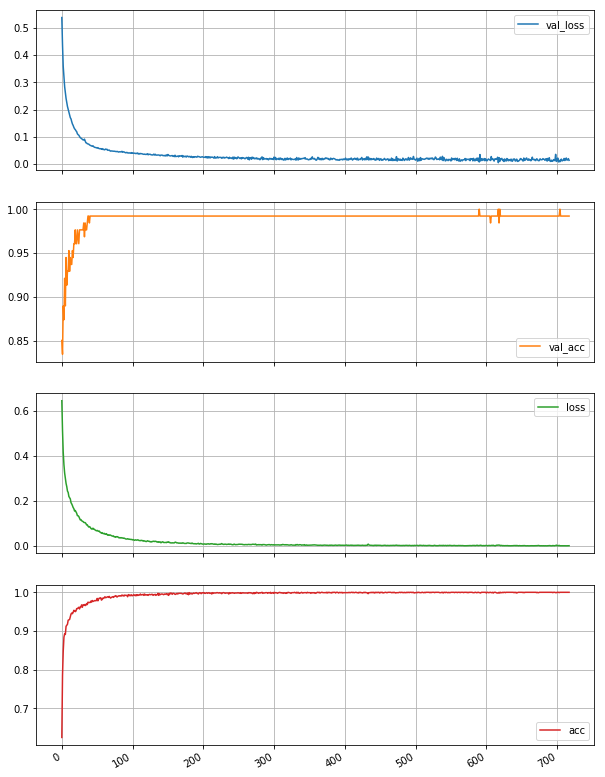

In [8]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [9]:
test_loss, test_acc = model.evaluate(ConcatenatedValidationDataMatrix, ConcatenatedValidationTarget)
print('The Validation Accuracy on the human observed dataset is: ' +str(test_acc))
print('The Validation Loss on the human observed dataset is: ' +str(test_loss))
test_loss, test_acc = model.evaluate(ConcatenatedTestingDataMatrix, ConcatenatedTestingTarget)
print('The Test Accuracy on the human observed dataset is: ' +str(test_acc))
print('The Test Loss on the human observed dataset is: ' +str(test_loss))

158/158 [==============================] - 0s 69us/step
The Validation Accuracy on the human observed dataset is: 1.0
The Validation Loss on the human observed dataset is: 0.0009298874684196862
157/157 [==============================] - 0s 57us/step
The Test Accuracy on the human observed dataset is: 0.9872611464968153
The Test Loss on the human observed dataset is: 0.09416567191339223


# Running the model on Subtracted values

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 9
drop_out = 0.2   # to remove overfitting we use dropout
first_dense_layer_nodes  = 512 
second_dense_layer_nodes = 1

def get_model_con():
    
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu')) 
    
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('sigmoid')) 
    
    
    model.summary()
    
    
    model.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [11]:
model1 = get_model_con()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               5120      
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [12]:
#hyper parameters
validation_data_split = 0.1
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience =100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
#dataset = pd.read_csv('training.csv')

# Process Dataset

history1 = model1.fit(SubtractedTrainingDataMatrix
                    , SubtractedTrainingTarget
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 1139 samples, validate on 127 samples
Epoch 1/10000
1139/1139 [==============================] - 0s 373us/step - loss: 0.5899 - acc: 0.8139 - val_loss: 0.5110 - val_acc: 0.9213
Epoch 2/10000
1139/1139 [==============================] - 0s 57us/step - loss: 0.4712 - acc: 0.9069 - val_loss: 0.4123 - val_acc: 0.9291
Epoch 3/10000
1139/1139 [==============================] - 0s 40us/step - loss: 0.3739 - acc: 0.9377 - val_loss: 0.3313 - val_acc: 0.9291
Epoch 4/10000
1139/1139 [==============================] - 0s 41us/step - loss: 0.3021 - acc: 0.9464 - val_loss: 0.2646 - val_acc: 0.9291
Epoch 5/10000
1139/1139 [==============================] - 0s 22us/step - loss: 0.2441 - acc: 0.9526 - val_loss: 0.2185 - val_acc: 0.9291
Epoch 6/10000
1139/1139 [==============================] - 0s 49us/step - loss: 0.2024 - acc: 0.9579 - val_loss: 0.1817 - val_acc: 0.9370
Epoch 7/10000
1139/1139 [==============================] - 0s 27us/step - loss: 0.1730 - acc: 0.9631 - val_loss: 0.1583 - va

1139/1139 [==============================] - 0s 31us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 60/10000
1139/1139 [==============================] - 0s 35us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 61/10000
1139/1139 [==============================] - 0s 42us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 62/10000
1139/1139 [==============================] - 0s 32us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 63/10000
1139/1139 [==============================] - 0s 33us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 64/10000
1139/1139 [==============================] - 0s 45us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 65/10000
1139/1139 [==============================] - 0s 38us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 66/10000
1139/1139 [================

1139/1139 [==============================] - 0s 27us/step - loss: 6.7685e-04 - acc: 1.0000 - val_loss: 5.4176e-04 - val_acc: 1.0000
Epoch 117/10000
1139/1139 [==============================] - 0s 31us/step - loss: 6.9882e-04 - acc: 1.0000 - val_loss: 5.2307e-04 - val_acc: 1.0000
Epoch 118/10000
1139/1139 [==============================] - 0s 34us/step - loss: 6.6579e-04 - acc: 1.0000 - val_loss: 5.1173e-04 - val_acc: 1.0000
Epoch 119/10000
1139/1139 [==============================] - 0s 34us/step - loss: 6.2940e-04 - acc: 1.0000 - val_loss: 5.0663e-04 - val_acc: 1.0000
Epoch 120/10000
1139/1139 [==============================] - 0s 30us/step - loss: 6.2514e-04 - acc: 1.0000 - val_loss: 4.9566e-04 - val_acc: 1.0000
Epoch 121/10000
1139/1139 [==============================] - 0s 39us/step - loss: 6.4408e-04 - acc: 1.0000 - val_loss: 4.8774e-04 - val_acc: 1.0000
Epoch 122/10000
1139/1139 [==============================] - 0s 37us/step - loss: 6.2319e-04 - acc: 1.0000 - val_loss: 4.7986e-0

1139/1139 [==============================] - 0s 32us/step - loss: 2.6538e-04 - acc: 1.0000 - val_loss: 2.0662e-04 - val_acc: 1.0000
Epoch 172/10000
1139/1139 [==============================] - 0s 35us/step - loss: 2.9348e-04 - acc: 1.0000 - val_loss: 2.0306e-04 - val_acc: 1.0000
Epoch 173/10000
1139/1139 [==============================] - 0s 35us/step - loss: 2.8349e-04 - acc: 1.0000 - val_loss: 2.0075e-04 - val_acc: 1.0000
Epoch 174/10000
1139/1139 [==============================] - 0s 33us/step - loss: 2.7404e-04 - acc: 1.0000 - val_loss: 1.9959e-04 - val_acc: 1.0000
Epoch 175/10000
1139/1139 [==============================] - 0s 34us/step - loss: 2.5180e-04 - acc: 1.0000 - val_loss: 1.9687e-04 - val_acc: 1.0000
Epoch 176/10000
1139/1139 [==============================] - 0s 34us/step - loss: 2.4937e-04 - acc: 1.0000 - val_loss: 1.9182e-04 - val_acc: 1.0000
Epoch 177/10000
1139/1139 [==============================] - 0s 35us/step - loss: 2.5484e-04 - acc: 1.0000 - val_loss: 1.8992e-0

1139/1139 [==============================] - 0s 28us/step - loss: 1.3467e-04 - acc: 1.0000 - val_loss: 1.0270e-04 - val_acc: 1.0000
Epoch 227/10000
1139/1139 [==============================] - 0s 26us/step - loss: 1.3363e-04 - acc: 1.0000 - val_loss: 1.0169e-04 - val_acc: 1.0000
Epoch 228/10000
1139/1139 [==============================] - 0s 25us/step - loss: 1.5541e-04 - acc: 1.0000 - val_loss: 1.0078e-04 - val_acc: 1.0000
Epoch 229/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.4151e-04 - acc: 1.0000 - val_loss: 1.0134e-04 - val_acc: 1.0000
Epoch 230/10000
1139/1139 [==============================] - 0s 26us/step - loss: 1.2908e-04 - acc: 1.0000 - val_loss: 1.0092e-04 - val_acc: 1.0000
Epoch 231/10000
1139/1139 [==============================] - 0s 25us/step - loss: 1.3735e-04 - acc: 1.0000 - val_loss: 9.8433e-05 - val_acc: 1.0000
Epoch 232/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.3958e-04 - acc: 1.0000 - val_loss: 9.6372e-0

1139/1139 [==============================] - 0s 25us/step - loss: 9.0100e-05 - acc: 1.0000 - val_loss: 5.8434e-05 - val_acc: 1.0000
Epoch 282/10000
1139/1139 [==============================] - 0s 27us/step - loss: 7.6356e-05 - acc: 1.0000 - val_loss: 5.7616e-05 - val_acc: 1.0000
Epoch 283/10000
1139/1139 [==============================] - 0s 11us/step - loss: 7.9963e-05 - acc: 1.0000 - val_loss: 5.7740e-05 - val_acc: 1.0000
Epoch 284/10000
1139/1139 [==============================] - 0s 47us/step - loss: 8.4063e-05 - acc: 1.0000 - val_loss: 5.7418e-05 - val_acc: 1.0000
Epoch 285/10000
1139/1139 [==============================] - 0s 25us/step - loss: 8.3603e-05 - acc: 1.0000 - val_loss: 5.6636e-05 - val_acc: 1.0000
Epoch 286/10000
1139/1139 [==============================] - 0s 26us/step - loss: 7.3347e-05 - acc: 1.0000 - val_loss: 5.6198e-05 - val_acc: 1.0000
Epoch 287/10000
1139/1139 [==============================] - 0s 25us/step - loss: 7.1306e-05 - acc: 1.0000 - val_loss: 5.5961e-0

1139/1139 [==============================] - 0s 31us/step - loss: 5.9152e-05 - acc: 1.0000 - val_loss: 3.6047e-05 - val_acc: 1.0000
Epoch 337/10000
1139/1139 [==============================] - 0s 22us/step - loss: 5.6026e-05 - acc: 1.0000 - val_loss: 3.5916e-05 - val_acc: 1.0000
Epoch 338/10000
1139/1139 [==============================] - 0s 27us/step - loss: 4.9120e-05 - acc: 1.0000 - val_loss: 3.5815e-05 - val_acc: 1.0000
Epoch 339/10000
1139/1139 [==============================] - 0s 36us/step - loss: 5.2162e-05 - acc: 1.0000 - val_loss: 3.5698e-05 - val_acc: 1.0000
Epoch 340/10000
1139/1139 [==============================] - 0s 30us/step - loss: 4.8845e-05 - acc: 1.0000 - val_loss: 3.5573e-05 - val_acc: 1.0000
Epoch 341/10000
1139/1139 [==============================] - 0s 24us/step - loss: 5.1512e-05 - acc: 1.0000 - val_loss: 3.5218e-05 - val_acc: 1.0000
Epoch 342/10000
1139/1139 [==============================] - 0s 25us/step - loss: 5.0045e-05 - acc: 1.0000 - val_loss: 3.4507e-0

1139/1139 [==============================] - 0s 69us/step - loss: 3.3694e-05 - acc: 1.0000 - val_loss: 2.3265e-05 - val_acc: 1.0000
Epoch 392/10000
1139/1139 [==============================] - 0s 31us/step - loss: 3.4237e-05 - acc: 1.0000 - val_loss: 2.3178e-05 - val_acc: 1.0000
Epoch 393/10000
1139/1139 [==============================] - 0s 54us/step - loss: 3.3673e-05 - acc: 1.0000 - val_loss: 2.3153e-05 - val_acc: 1.0000
Epoch 394/10000
1139/1139 [==============================] - 0s 29us/step - loss: 3.7483e-05 - acc: 1.0000 - val_loss: 2.2771e-05 - val_acc: 1.0000
Epoch 395/10000
1139/1139 [==============================] - 0s 32us/step - loss: 3.1208e-05 - acc: 1.0000 - val_loss: 2.2441e-05 - val_acc: 1.0000
Epoch 396/10000
1139/1139 [==============================] - 0s 38us/step - loss: 3.2485e-05 - acc: 1.0000 - val_loss: 2.2248e-05 - val_acc: 1.0000
Epoch 397/10000
1139/1139 [==============================] - 0s 27us/step - loss: 3.3595e-05 - acc: 1.0000 - val_loss: 2.2057e-0

1139/1139 [==============================] - 0s 30us/step - loss: 2.1968e-05 - acc: 1.0000 - val_loss: 1.5077e-05 - val_acc: 1.0000
Epoch 447/10000
1139/1139 [==============================] - 0s 29us/step - loss: 2.2548e-05 - acc: 1.0000 - val_loss: 1.5113e-05 - val_acc: 1.0000
Epoch 448/10000
1139/1139 [==============================] - 0s 25us/step - loss: 2.0674e-05 - acc: 1.0000 - val_loss: 1.5175e-05 - val_acc: 1.0000
Epoch 449/10000
1139/1139 [==============================] - 0s 28us/step - loss: 2.1414e-05 - acc: 1.0000 - val_loss: 1.5112e-05 - val_acc: 1.0000
Epoch 450/10000
1139/1139 [==============================] - 0s 25us/step - loss: 2.2709e-05 - acc: 1.0000 - val_loss: 1.5067e-05 - val_acc: 1.0000
Epoch 451/10000
1139/1139 [==============================] - 0s 29us/step - loss: 2.1732e-05 - acc: 1.0000 - val_loss: 1.4991e-05 - val_acc: 1.0000
Epoch 452/10000
1139/1139 [==============================] - 0s 41us/step - loss: 2.2759e-05 - acc: 1.0000 - val_loss: 1.4774e-0

1139/1139 [==============================] - 0s 32us/step - loss: 1.5358e-05 - acc: 1.0000 - val_loss: 1.0581e-05 - val_acc: 1.0000
Epoch 502/10000
1139/1139 [==============================] - 0s 32us/step - loss: 1.5728e-05 - acc: 1.0000 - val_loss: 1.0413e-05 - val_acc: 1.0000
Epoch 503/10000
1139/1139 [==============================] - 0s 43us/step - loss: 1.6687e-05 - acc: 1.0000 - val_loss: 1.0348e-05 - val_acc: 1.0000
Epoch 504/10000
1139/1139 [==============================] - 0s 35us/step - loss: 1.4739e-05 - acc: 1.0000 - val_loss: 1.0280e-05 - val_acc: 1.0000
Epoch 505/10000
1139/1139 [==============================] - 0s 38us/step - loss: 1.5368e-05 - acc: 1.0000 - val_loss: 1.0155e-05 - val_acc: 1.0000
Epoch 506/10000
1139/1139 [==============================] - 0s 36us/step - loss: 1.4755e-05 - acc: 1.0000 - val_loss: 1.0062e-05 - val_acc: 1.0000
Epoch 507/10000
1139/1139 [==============================] - 0s 33us/step - loss: 1.6046e-05 - acc: 1.0000 - val_loss: 9.9233e-0

1139/1139 [==============================] - 0s 31us/step - loss: 1.2724e-05 - acc: 1.0000 - val_loss: 7.0917e-06 - val_acc: 1.0000
Epoch 557/10000
1139/1139 [==============================] - 0s 37us/step - loss: 1.1124e-05 - acc: 1.0000 - val_loss: 7.0091e-06 - val_acc: 1.0000
Epoch 558/10000
1139/1139 [==============================] - 0s 37us/step - loss: 1.0956e-05 - acc: 1.0000 - val_loss: 6.9364e-06 - val_acc: 1.0000
Epoch 559/10000
1139/1139 [==============================] - 0s 33us/step - loss: 1.1806e-05 - acc: 1.0000 - val_loss: 6.9068e-06 - val_acc: 1.0000
Epoch 560/10000
1139/1139 [==============================] - 0s 34us/step - loss: 1.0221e-05 - acc: 1.0000 - val_loss: 6.9162e-06 - val_acc: 1.0000
Epoch 561/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.1843e-05 - acc: 1.0000 - val_loss: 6.9344e-06 - val_acc: 1.0000
Epoch 562/10000
1139/1139 [==============================] - 0s 30us/step - loss: 1.2215e-05 - acc: 1.0000 - val_loss: 6.9419e-0

1139/1139 [==============================] - 0s 36us/step - loss: 7.6863e-06 - acc: 1.0000 - val_loss: 5.0234e-06 - val_acc: 1.0000
Epoch 612/10000
1139/1139 [==============================] - 0s 31us/step - loss: 7.9999e-06 - acc: 1.0000 - val_loss: 4.9951e-06 - val_acc: 1.0000
Epoch 613/10000
1139/1139 [==============================] - 0s 31us/step - loss: 7.4407e-06 - acc: 1.0000 - val_loss: 4.9490e-06 - val_acc: 1.0000
Epoch 614/10000
1139/1139 [==============================] - 0s 27us/step - loss: 8.5151e-06 - acc: 1.0000 - val_loss: 4.9048e-06 - val_acc: 1.0000
Epoch 615/10000
1139/1139 [==============================] - 0s 41us/step - loss: 8.4212e-06 - acc: 1.0000 - val_loss: 4.8858e-06 - val_acc: 1.0000
Epoch 616/10000
1139/1139 [==============================] - 0s 32us/step - loss: 7.7367e-06 - acc: 1.0000 - val_loss: 4.8712e-06 - val_acc: 1.0000
Epoch 617/10000
1139/1139 [==============================] - 0s 27us/step - loss: 8.5634e-06 - acc: 1.0000 - val_loss: 4.8442e-0

1139/1139 [==============================] - 0s 41us/step - loss: 5.1007e-06 - acc: 1.0000 - val_loss: 3.5828e-06 - val_acc: 1.0000
Epoch 667/10000
1139/1139 [==============================] - 0s 30us/step - loss: 5.4994e-06 - acc: 1.0000 - val_loss: 3.5596e-06 - val_acc: 1.0000
Epoch 668/10000
1139/1139 [==============================] - 0s 27us/step - loss: 5.6087e-06 - acc: 1.0000 - val_loss: 3.5451e-06 - val_acc: 1.0000
Epoch 669/10000
1139/1139 [==============================] - 0s 27us/step - loss: 6.9948e-06 - acc: 1.0000 - val_loss: 3.5011e-06 - val_acc: 1.0000
Epoch 670/10000
1139/1139 [==============================] - 0s 31us/step - loss: 5.4590e-06 - acc: 1.0000 - val_loss: 3.4948e-06 - val_acc: 1.0000
Epoch 671/10000
1139/1139 [==============================] - 0s 32us/step - loss: 5.4196e-06 - acc: 1.0000 - val_loss: 3.4884e-06 - val_acc: 1.0000
Epoch 672/10000
1139/1139 [==============================] - 0s 28us/step - loss: 6.3407e-06 - acc: 1.0000 - val_loss: 3.4580e-0

1139/1139 [==============================] - 0s 29us/step - loss: 4.5583e-06 - acc: 1.0000 - val_loss: 2.5689e-06 - val_acc: 1.0000
Epoch 722/10000
1139/1139 [==============================] - 0s 30us/step - loss: 4.3321e-06 - acc: 1.0000 - val_loss: 2.5761e-06 - val_acc: 1.0000
Epoch 723/10000
1139/1139 [==============================] - 0s 31us/step - loss: 4.3078e-06 - acc: 1.0000 - val_loss: 2.5733e-06 - val_acc: 1.0000
Epoch 724/10000
1139/1139 [==============================] - 0s 29us/step - loss: 3.6699e-06 - acc: 1.0000 - val_loss: 2.5819e-06 - val_acc: 1.0000
Epoch 725/10000
1139/1139 [==============================] - 0s 32us/step - loss: 4.5425e-06 - acc: 1.0000 - val_loss: 2.5618e-06 - val_acc: 1.0000
Epoch 726/10000
1139/1139 [==============================] - 0s 31us/step - loss: 4.0390e-06 - acc: 1.0000 - val_loss: 2.5325e-06 - val_acc: 1.0000
Epoch 727/10000
1139/1139 [==============================] - 0s 29us/step - loss: 3.9967e-06 - acc: 1.0000 - val_loss: 2.5044e-0

1139/1139 [==============================] - 0s 25us/step - loss: 3.1709e-06 - acc: 1.0000 - val_loss: 1.8981e-06 - val_acc: 1.0000
Epoch 777/10000
1139/1139 [==============================] - 0s 26us/step - loss: 2.7884e-06 - acc: 1.0000 - val_loss: 1.8910e-06 - val_acc: 1.0000
Epoch 778/10000
1139/1139 [==============================] - 0s 32us/step - loss: 3.0778e-06 - acc: 1.0000 - val_loss: 1.8764e-06 - val_acc: 1.0000
Epoch 779/10000
1139/1139 [==============================] - 0s 25us/step - loss: 3.2902e-06 - acc: 1.0000 - val_loss: 1.8637e-06 - val_acc: 1.0000
Epoch 780/10000
1139/1139 [==============================] - 0s 26us/step - loss: 3.0556e-06 - acc: 1.0000 - val_loss: 1.8480e-06 - val_acc: 1.0000
Epoch 781/10000
1139/1139 [==============================] - 0s 25us/step - loss: 3.3901e-06 - acc: 1.0000 - val_loss: 1.8543e-06 - val_acc: 1.0000
Epoch 782/10000
1139/1139 [==============================] - 0s 28us/step - loss: 3.7746e-06 - acc: 1.0000 - val_loss: 1.8475e-0

1139/1139 [==============================] - 0s 28us/step - loss: 2.4551e-06 - acc: 1.0000 - val_loss: 1.3845e-06 - val_acc: 1.0000
Epoch 832/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.3545e-06 - acc: 1.0000 - val_loss: 1.3823e-06 - val_acc: 1.0000
Epoch 833/10000
1139/1139 [==============================] - 0s 25us/step - loss: 2.3427e-06 - acc: 1.0000 - val_loss: 1.3728e-06 - val_acc: 1.0000
Epoch 834/10000
1139/1139 [==============================] - 0s 25us/step - loss: 2.1237e-06 - acc: 1.0000 - val_loss: 1.3660e-06 - val_acc: 1.0000
Epoch 835/10000
1139/1139 [==============================] - 0s 25us/step - loss: 2.1076e-06 - acc: 1.0000 - val_loss: 1.3536e-06 - val_acc: 1.0000
Epoch 836/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.2776e-06 - acc: 1.0000 - val_loss: 1.3395e-06 - val_acc: 1.0000
Epoch 837/10000
1139/1139 [==============================] - 0s 26us/step - loss: 2.4298e-06 - acc: 1.0000 - val_loss: 1.3200e-0

1139/1139 [==============================] - 0s 25us/step - loss: 1.9376e-06 - acc: 1.0000 - val_loss: 9.8218e-07 - val_acc: 1.0000
Epoch 887/10000
1139/1139 [==============================] - 0s 31us/step - loss: 1.5880e-06 - acc: 1.0000 - val_loss: 9.7724e-07 - val_acc: 1.0000
Epoch 888/10000
1139/1139 [==============================] - 0s 26us/step - loss: 1.6085e-06 - acc: 1.0000 - val_loss: 9.7544e-07 - val_acc: 1.0000
Epoch 889/10000
1139/1139 [==============================] - 0s 25us/step - loss: 1.7032e-06 - acc: 1.0000 - val_loss: 9.7479e-07 - val_acc: 1.0000
Epoch 890/10000
1139/1139 [==============================] - 0s 25us/step - loss: 1.9528e-06 - acc: 1.0000 - val_loss: 9.7103e-07 - val_acc: 1.0000
Epoch 891/10000
1139/1139 [==============================] - 0s 25us/step - loss: 1.5902e-06 - acc: 1.0000 - val_loss: 9.6471e-07 - val_acc: 1.0000
Epoch 892/10000
1139/1139 [==============================] - 0s 26us/step - loss: 1.8228e-06 - acc: 1.0000 - val_loss: 9.6164e-0

1139/1139 [==============================] - 0s 24us/step - loss: 1.5979e-06 - acc: 1.0000 - val_loss: 7.3146e-07 - val_acc: 1.0000
Epoch 942/10000
1139/1139 [==============================] - 0s 25us/step - loss: 1.3409e-06 - acc: 1.0000 - val_loss: 7.2861e-07 - val_acc: 1.0000
Epoch 943/10000
1139/1139 [==============================] - 0s 26us/step - loss: 1.3437e-06 - acc: 1.0000 - val_loss: 7.2761e-07 - val_acc: 1.0000
Epoch 944/10000
1139/1139 [==============================] - 0s 33us/step - loss: 1.4614e-06 - acc: 1.0000 - val_loss: 7.2328e-07 - val_acc: 1.0000
Epoch 945/10000
1139/1139 [==============================] - 0s 25us/step - loss: 1.2438e-06 - acc: 1.0000 - val_loss: 7.2350e-07 - val_acc: 1.0000
Epoch 946/10000
1139/1139 [==============================] - 0s 39us/step - loss: 1.4785e-06 - acc: 1.0000 - val_loss: 7.1845e-07 - val_acc: 1.0000
Epoch 947/10000
1139/1139 [==============================] - 0s 25us/step - loss: 1.3042e-06 - acc: 1.0000 - val_loss: 7.1579e-0

1139/1139 [==============================] - 0s 25us/step - loss: 9.4609e-07 - acc: 1.0000 - val_loss: 5.5426e-07 - val_acc: 1.0000
Epoch 997/10000
1139/1139 [==============================] - 0s 26us/step - loss: 1.0293e-06 - acc: 1.0000 - val_loss: 5.4782e-07 - val_acc: 1.0000
Epoch 998/10000
1139/1139 [==============================] - 0s 24us/step - loss: 1.0816e-06 - acc: 1.0000 - val_loss: 5.4237e-07 - val_acc: 1.0000
Epoch 999/10000
1139/1139 [==============================] - 0s 26us/step - loss: 1.1309e-06 - acc: 1.0000 - val_loss: 5.3703e-07 - val_acc: 1.0000
Epoch 1000/10000
1139/1139 [==============================] - 0s 24us/step - loss: 1.0121e-06 - acc: 1.0000 - val_loss: 5.3511e-07 - val_acc: 1.0000
Epoch 1001/10000
1139/1139 [==============================] - 0s 19us/step - loss: 1.0909e-06 - acc: 1.0000 - val_loss: 5.3249e-07 - val_acc: 1.0000
Epoch 1002/10000
1139/1139 [==============================] - 0s 27us/step - loss: 9.2688e-07 - acc: 1.0000 - val_loss: 5.2932

1139/1139 [==============================] - 0s 20us/step - loss: 6.4467e-07 - acc: 1.0000 - val_loss: 4.1127e-07 - val_acc: 1.0000
Epoch 1052/10000
1139/1139 [==============================] - 0s 21us/step - loss: 7.9009e-07 - acc: 1.0000 - val_loss: 4.0435e-07 - val_acc: 1.0000
Epoch 1053/10000
1139/1139 [==============================] - 0s 18us/step - loss: 7.0557e-07 - acc: 1.0000 - val_loss: 4.0290e-07 - val_acc: 1.0000
Epoch 1054/10000
1139/1139 [==============================] - 0s 39us/step - loss: 7.2781e-07 - acc: 1.0000 - val_loss: 3.9627e-07 - val_acc: 1.0000
Epoch 1055/10000
1139/1139 [==============================] - 0s 14us/step - loss: 7.5110e-07 - acc: 1.0000 - val_loss: 3.9545e-07 - val_acc: 1.0000
Epoch 1056/10000
1139/1139 [==============================] - 0s 24us/step - loss: 6.3280e-07 - acc: 1.0000 - val_loss: 3.9522e-07 - val_acc: 1.0000
Epoch 1057/10000
1139/1139 [==============================] - 0s 33us/step - loss: 7.1742e-07 - acc: 1.0000 - val_loss: 3.9

1139/1139 [==============================] - 0s 27us/step - loss: 6.5983e-07 - acc: 1.0000 - val_loss: 3.1730e-07 - val_acc: 1.0000
Epoch 1107/10000
1139/1139 [==============================] - 0s 32us/step - loss: 6.1713e-07 - acc: 1.0000 - val_loss: 3.1324e-07 - val_acc: 1.0000
Epoch 1108/10000
1139/1139 [==============================] - 0s 32us/step - loss: 5.6934e-07 - acc: 1.0000 - val_loss: 3.1206e-07 - val_acc: 1.0000
Epoch 1109/10000
1139/1139 [==============================] - 0s 29us/step - loss: 6.6347e-07 - acc: 1.0000 - val_loss: 3.0969e-07 - val_acc: 1.0000
Epoch 1110/10000
1139/1139 [==============================] - 0s 29us/step - loss: 5.7123e-07 - acc: 1.0000 - val_loss: 3.0911e-07 - val_acc: 1.0000
Epoch 1111/10000
1139/1139 [==============================] - 0s 30us/step - loss: 5.9322e-07 - acc: 1.0000 - val_loss: 3.0450e-07 - val_acc: 1.0000
Epoch 1112/10000
1139/1139 [==============================] - 0s 27us/step - loss: 6.5575e-07 - acc: 1.0000 - val_loss: 3.0

1139/1139 [==============================] - 0s 27us/step - loss: 4.1610e-07 - acc: 1.0000 - val_loss: 2.4652e-07 - val_acc: 1.0000
Epoch 1162/10000
1139/1139 [==============================] - 0s 27us/step - loss: 4.7673e-07 - acc: 1.0000 - val_loss: 2.4702e-07 - val_acc: 1.0000
Epoch 1163/10000
1139/1139 [==============================] - 0s 31us/step - loss: 5.1517e-07 - acc: 1.0000 - val_loss: 2.4646e-07 - val_acc: 1.0000
Epoch 1164/10000
1139/1139 [==============================] - 0s 27us/step - loss: 4.8613e-07 - acc: 1.0000 - val_loss: 2.4709e-07 - val_acc: 1.0000
Epoch 1165/10000
1139/1139 [==============================] - 0s 27us/step - loss: 4.4467e-07 - acc: 1.0000 - val_loss: 2.4400e-07 - val_acc: 1.0000
Epoch 1166/10000
1139/1139 [==============================] - 0s 30us/step - loss: 4.5698e-07 - acc: 1.0000 - val_loss: 2.4149e-07 - val_acc: 1.0000
Epoch 1167/10000
1139/1139 [==============================] - 0s 31us/step - loss: 4.9775e-07 - acc: 1.0000 - val_loss: 2.3

Epoch 1216/10000
1139/1139 [==============================] - 0s 14us/step - loss: 3.9103e-07 - acc: 1.0000 - val_loss: 1.9970e-07 - val_acc: 1.0000
Epoch 1217/10000
1139/1139 [==============================] - 0s 14us/step - loss: 3.4946e-07 - acc: 1.0000 - val_loss: 1.9987e-07 - val_acc: 1.0000
Epoch 1218/10000
1139/1139 [==============================] - 0s 14us/step - loss: 3.9677e-07 - acc: 1.0000 - val_loss: 1.9966e-07 - val_acc: 1.0000
Epoch 1219/10000
1139/1139 [==============================] - 0s 27us/step - loss: 3.5078e-07 - acc: 1.0000 - val_loss: 1.9841e-07 - val_acc: 1.0000
Epoch 1220/10000
1139/1139 [==============================] - 0s 14us/step - loss: 3.0555e-07 - acc: 1.0000 - val_loss: 1.9764e-07 - val_acc: 1.0000
Epoch 1221/10000
1139/1139 [==============================] - 0s 27us/step - loss: 4.2262e-07 - acc: 1.0000 - val_loss: 1.9747e-07 - val_acc: 1.0000
Epoch 1222/10000
1139/1139 [==============================] - 0s 27us/step - loss: 4.2262e-07 - acc: 1.000

Epoch 1271/10000
1139/1139 [==============================] - 0s 25us/step - loss: 2.9821e-07 - acc: 1.0000 - val_loss: 1.6410e-07 - val_acc: 1.0000
Epoch 1272/10000
1139/1139 [==============================] - 0s 25us/step - loss: 3.0491e-07 - acc: 1.0000 - val_loss: 1.6455e-07 - val_acc: 1.0000
Epoch 1273/10000
1139/1139 [==============================] - ETA: 0s - loss: 1.8571e-07 - acc: 1.000 - 0s 25us/step - loss: 3.0398e-07 - acc: 1.0000 - val_loss: 1.6447e-07 - val_acc: 1.0000
Epoch 1274/10000
1139/1139 [==============================] - 0s 25us/step - loss: 2.9301e-07 - acc: 1.0000 - val_loss: 1.6343e-07 - val_acc: 1.0000
Epoch 1275/10000
1139/1139 [==============================] - 0s 24us/step - loss: 3.4867e-07 - acc: 1.0000 - val_loss: 1.6393e-07 - val_acc: 1.0000
Epoch 1276/10000
1139/1139 [==============================] - 0s 25us/step - loss: 3.0311e-07 - acc: 1.0000 - val_loss: 1.6147e-07 - val_acc: 1.0000
Epoch 1277/10000
1139/1139 [==============================] - ET

1139/1139 [==============================] - 0s 27us/step - loss: 2.4312e-07 - acc: 1.0000 - val_loss: 1.4525e-07 - val_acc: 1.0000
Epoch 1326/10000
1139/1139 [==============================] - 0s 14us/step - loss: 2.8058e-07 - acc: 1.0000 - val_loss: 1.4581e-07 - val_acc: 1.0000
Epoch 1327/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.4653e-07 - acc: 1.0000 - val_loss: 1.4564e-07 - val_acc: 1.0000
Epoch 1328/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.2560e-07 - acc: 1.0000 - val_loss: 1.4556e-07 - val_acc: 1.0000
Epoch 1329/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.6383e-07 - acc: 1.0000 - val_loss: 1.4394e-07 - val_acc: 1.0000
Epoch 1330/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.5138e-07 - acc: 1.0000 - val_loss: 1.4385e-07 - val_acc: 1.0000
Epoch 1331/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.3683e-07 - acc: 1.0000 - val_loss: 1.4

Epoch 1380/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.2947e-07 - acc: 1.0000 - val_loss: 1.3260e-07 - val_acc: 1.0000
Epoch 1381/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.5107e-07 - acc: 1.0000 - val_loss: 1.3337e-07 - val_acc: 1.0000
Epoch 1382/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.2471e-07 - acc: 1.0000 - val_loss: 1.3497e-07 - val_acc: 1.0000
Epoch 1383/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.2355e-07 - acc: 1.0000 - val_loss: 1.3403e-07 - val_acc: 1.0000
Epoch 1384/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.2419e-07 - acc: 1.0000 - val_loss: 1.3411e-07 - val_acc: 1.0000
Epoch 1385/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.0669e-07 - acc: 1.0000 - val_loss: 1.3136e-07 - val_acc: 1.0000
Epoch 1386/10000
1139/1139 [==============================] - 0s 37us/step - loss: 2.1152e-07 - acc: 1.000

Epoch 1435/10000
1139/1139 [==============================] - 0s 55us/step - loss: 1.9227e-07 - acc: 1.0000 - val_loss: 1.2286e-07 - val_acc: 1.0000
Epoch 1436/10000
1139/1139 [==============================] - 0s 21us/step - loss: 1.8929e-07 - acc: 1.0000 - val_loss: 1.2284e-07 - val_acc: 1.0000
Epoch 1437/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.8117e-07 - acc: 1.0000 - val_loss: 1.2283e-07 - val_acc: 1.0000
Epoch 1438/10000
1139/1139 [==============================] - 0s 14us/step - loss: 2.1193e-07 - acc: 1.0000 - val_loss: 1.2283e-07 - val_acc: 1.0000
Epoch 1439/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.0186e-07 - acc: 1.0000 - val_loss: 1.2275e-07 - val_acc: 1.0000
Epoch 1440/10000
1139/1139 [==============================] - 0s 27us/step - loss: 2.1814e-07 - acc: 1.0000 - val_loss: 1.2363e-07 - val_acc: 1.0000
Epoch 1441/10000
1139/1139 [==============================] - 0s 14us/step - loss: 2.0093e-07 - acc: 1.000

Epoch 1490/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.5830e-07 - acc: 1.0000 - val_loss: 1.1626e-07 - val_acc: 1.0000
Epoch 1491/10000
1139/1139 [==============================] - 0s 55us/step - loss: 1.6140e-07 - acc: 1.0000 - val_loss: 1.1627e-07 - val_acc: 1.0000
Epoch 1492/10000
1139/1139 [==============================] - 0s 41us/step - loss: 1.6493e-07 - acc: 1.0000 - val_loss: 1.1626e-07 - val_acc: 1.0000
Epoch 1493/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.5991e-07 - acc: 1.0000 - val_loss: 1.1625e-07 - val_acc: 1.0000
Epoch 1494/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.7644e-07 - acc: 1.0000 - val_loss: 1.1622e-07 - val_acc: 1.0000
Epoch 1495/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.7001e-07 - acc: 1.0000 - val_loss: 1.1620e-07 - val_acc: 1.0000
Epoch 1496/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.6253e-07 - acc: 1.000

Epoch 1545/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.9861e-07 - acc: 1.0000 - val_loss: 1.1325e-07 - val_acc: 1.0000
Epoch 1546/10000
1139/1139 [==============================] - 0s 14us/step - loss: 1.4384e-07 - acc: 1.0000 - val_loss: 1.1231e-07 - val_acc: 1.0000
Epoch 1547/10000
1139/1139 [==============================] - 0s 14us/step - loss: 1.4903e-07 - acc: 1.0000 - val_loss: 1.1231e-07 - val_acc: 1.0000
Epoch 1548/10000
1139/1139 [==============================] - 0s 22us/step - loss: 1.6227e-07 - acc: 1.0000 - val_loss: 1.1231e-07 - val_acc: 1.0000
Epoch 1549/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.7123e-07 - acc: 1.0000 - val_loss: 1.1231e-07 - val_acc: 1.0000
Epoch 1550/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.6291e-07 - acc: 1.0000 - val_loss: 1.1231e-07 - val_acc: 1.0000
Epoch 1551/10000
1139/1139 [==============================] - 0s 14us/step - loss: 1.4396e-07 - acc: 1.000

Epoch 1600/10000
1139/1139 [==============================] - 0s 28us/step - loss: 1.5575e-07 - acc: 1.0000 - val_loss: 1.1138e-07 - val_acc: 1.0000
Epoch 1601/10000
1139/1139 [==============================] - 0s 26us/step - loss: 1.5226e-07 - acc: 1.0000 - val_loss: 1.1138e-07 - val_acc: 1.0000
Epoch 1602/10000
1139/1139 [==============================] - 0s 35us/step - loss: 1.4006e-07 - acc: 1.0000 - val_loss: 1.1138e-07 - val_acc: 1.0000
Epoch 1603/10000
1139/1139 [==============================] - 0s 32us/step - loss: 1.5143e-07 - acc: 1.0000 - val_loss: 1.1138e-07 - val_acc: 1.0000
Epoch 1604/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.4033e-07 - acc: 1.0000 - val_loss: 1.1138e-07 - val_acc: 1.0000
Epoch 1605/10000
1139/1139 [==============================] - 0s 32us/step - loss: 1.4221e-07 - acc: 1.0000 - val_loss: 1.1138e-07 - val_acc: 1.0000
Epoch 1606/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.4954e-07 - acc: 1.000

Epoch 1655/10000
1139/1139 [==============================] - 0s 25us/step - loss: 1.4720e-07 - acc: 1.0000 - val_loss: 1.1044e-07 - val_acc: 1.0000
Epoch 1656/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.2580e-07 - acc: 1.0000 - val_loss: 1.1044e-07 - val_acc: 1.0000
Epoch 1657/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.2872e-07 - acc: 1.0000 - val_loss: 1.1044e-07 - val_acc: 1.0000
Epoch 1658/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.6622e-07 - acc: 1.0000 - val_loss: 1.1044e-07 - val_acc: 1.0000
Epoch 1659/10000
1139/1139 [==============================] - 0s 25us/step - loss: 1.3360e-07 - acc: 1.0000 - val_loss: 1.1044e-07 - val_acc: 1.0000
Epoch 1660/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.2690e-07 - acc: 1.0000 - val_loss: 1.1044e-07 - val_acc: 1.0000
Epoch 1661/10000
1139/1139 [==============================] - 0s 24us/step - loss: 1.3446e-07 - acc: 1.000

Epoch 1710/10000
1139/1139 [==============================] - 0s 28us/step - loss: 1.2621e-07 - acc: 1.0000 - val_loss: 1.1044e-07 - val_acc: 1.0000
Epoch 1711/10000
1139/1139 [==============================] - 0s 32us/step - loss: 1.2749e-07 - acc: 1.0000 - val_loss: 1.1044e-07 - val_acc: 1.0000
Epoch 1712/10000
1139/1139 [==============================] - 0s 27us/step - loss: 1.2525e-07 - acc: 1.0000 - val_loss: 1.1044e-07 - val_acc: 1.0000
Epoch 1713/10000
1139/1139 [==============================] - 0s 29us/step - loss: 1.2939e-07 - acc: 1.0000 - val_loss: 1.1044e-07 - val_acc: 1.0000
Epoch 1714/10000
1139/1139 [==============================] - 0s 28us/step - loss: 1.2097e-07 - acc: 1.0000 - val_loss: 1.1044e-07 - val_acc: 1.0000
Epoch 1715/10000
1139/1139 [==============================] - 0s 51us/step - loss: 1.2877e-07 - acc: 1.0000 - val_loss: 1.1044e-07 - val_acc: 1.0000
Epoch 01715: early stopping


158/158 [==============================] - 0s 49us/step
The Validation Accuracy on the human observed dataset is: 1.0
The Validation Loss on the human observed dataset is: 1.0936151575885525e-07
157/157 [==============================] - 0s 38us/step
The Test Accuracy on the human observed dataset is: 1.0
The Test Loss on the human observed dataset is: 1.0991055077534363e-07


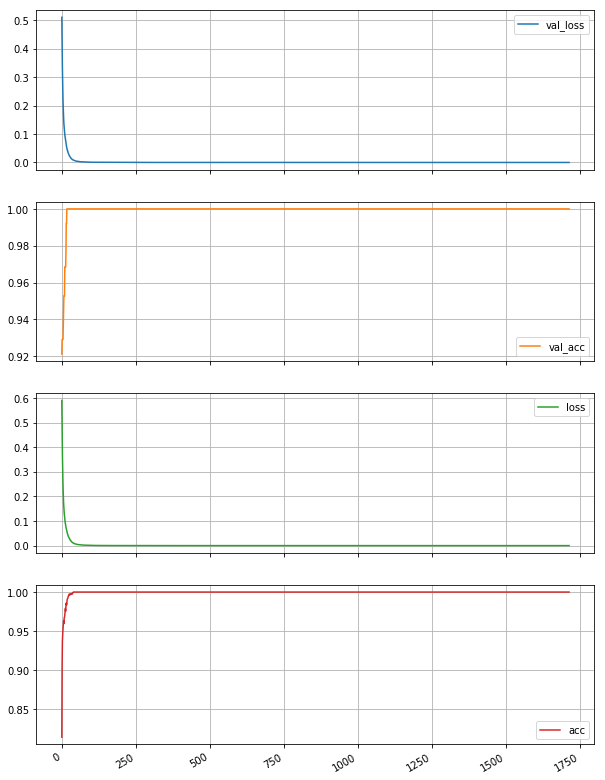

In [13]:
%matplotlib inline
df = pd.DataFrame(history1.history)
df.plot(subplots=True, grid=True, figsize=(10,15))


test_loss, test_acc = model1.evaluate(SubtractedValidationDataMatrix, SubtractedValidationTarget)
print('The Validation Accuracy on the human observed dataset is: ' +str(test_acc))
print('The Validation Loss on the human observed dataset is: ' +str(test_loss))


test_loss, test_acc = model1.evaluate(SubtractedTestingDataMatrix, SubtractedTestingTarget)
print('The Test Accuracy on the human observed dataset is: ' +str(test_acc))
print('The Test Loss on the human observed dataset is: ' +str(test_loss))

# Running the concatenated data set on GSC dataset

In [14]:
# concatenate('gsc/concatenated_same_pairs.csv','gsc/gsc_same_pairs.csv','gsc/GSC-Features.csv',500)
# subtract('gsc/subtracted_same_pairs.csv','gsc/concatenated_same_pairs.csv',500)
# concatenate('gsc/concatenated_diff_pairs.csv','gsc/gsc_diffn_pairs.csv','gsc/GSC-Features.csv',502)
# subtract('gsc/subtracted_diff_pairs.csv','gsc/concatenated_diff_pairs.csv',502)
# combine_pairs('gsc/concatenated_pairs.csv','gsc/concatenated_same_pairs.csv','gsc/concatenated_diff_pairs.csv');
# combine_pairs('gsc/subtracted_pairs.csv','gsc/subtracted_same_pairs.csv','gsc/subtracted_diff_pairs.csv');
# shuffled_pairs('gsc/shuffled_concatenated_pairs.csv','gsc/concatenated_pairs.csv');
# shuffled_pairs('gsc/shuffled_subtracted_pairs.csv','gsc/subtracted_pairs.csv');

#RawTarget
rawConcatenatedTarget = GetTarget('gsc/shuffled_concatenated_pairs.csv')
rawSubtractedTarget = GetTarget('gsc/shuffled_subtracted_pairs.csv')
#RawData
rawConcatenatedData=GetRawData('gsc/shuffled_concatenated_pairs.csv')
rawSubtractedData=GetRawData('gsc/shuffled_subtracted_pairs.csv')
# print(rawConcatenatedData.shape)
# print(rawSubtractedData.shape)
#splitting
TrainingPercent=80;
ValidationPercent=10;
TestPercent=10;
ConcatenatedTrainingTarget = np.array(GenerateTrainingTarget(rawConcatenatedTarget,TrainingPercent))
ConcatenatedTrainingDataMatrix   = np.transpose(GenerateTrainingDataMatrix(rawConcatenatedData,TrainingPercent))
print("The shape of ConcatenatedTrainingTarget is ", ConcatenatedTrainingTarget.shape)
print("The shape of ConcatenatedTrainingDataMatrix is ",ConcatenatedTrainingDataMatrix.shape)

ConcatenatedValidationTarget = np.array(GenerateTargetVector(rawConcatenatedTarget,ValidationPercent, (len(ConcatenatedTrainingTarget))))
ConcatenatedValidationDataMatrix    =np.transpose(GenerateTargetData(rawConcatenatedData,ValidationPercent, (len(ConcatenatedTrainingTarget))))

print("The shape of ConcatenatedValidationTarget is ", ConcatenatedValidationTarget.shape)
print("The shape of ConcatenatedValidationDataMatrix is ",ConcatenatedValidationDataMatrix.shape)
ConcatenatedTestingTarget = np.array(GenerateTargetVector(rawConcatenatedTarget,TestPercent, (len(ConcatenatedTrainingTarget)+len(ConcatenatedValidationTarget))))
ConcatenatedTestingDataMatrix = np.transpose(GenerateTargetData(rawConcatenatedData,TestPercent, (len(ConcatenatedTrainingTarget)+len(ConcatenatedValidationTarget))))

print("The shape of ConcatenatedTestingTarget is ", ConcatenatedTestingTarget.shape)
print("The shape of ConcatenatedTestingDataMatrix is ",ConcatenatedTestingDataMatrix.shape)
#subtracted

SubtractedTrainingTarget = np.array(GenerateTrainingTarget(rawSubtractedTarget,TrainingPercent))
SubtractedTrainingDataMatrix   = np.transpose(GenerateTrainingDataMatrix(rawSubtractedData,TrainingPercent))
SubtractedValidationTarget = np.array(GenerateTargetVector(rawSubtractedTarget,ValidationPercent, (len(SubtractedTrainingTarget))))
SubtractedValidationDataMatrix    = np.transpose(GenerateTargetData(rawSubtractedData,ValidationPercent, (len(SubtractedTrainingTarget))))
SubtractedTestingTarget = np.array(GenerateTargetVector(rawSubtractedTarget,TestPercent, (len(SubtractedTrainingTarget)+len(SubtractedValidationTarget))))
SubtractedTestingDataMatrix = np.transpose(GenerateTargetData(rawSubtractedData,TestPercent, (len(SubtractedTrainingTarget)+len(SubtractedValidationTarget))))
print("The shape of SubtractedTrainingTarget is ", SubtractedTrainingTarget.shape)
print("The shape of SubtractedTrainingDataMatrix is ",SubtractedTrainingDataMatrix.shape)
print("The shape of SubtractedValidationTarget is ", SubtractedValidationTarget.shape)
print("The shape of SubtractedValidationDataMatrix is ",SubtractedValidationDataMatrix.shape)
print("The shape of SubtractedTestingTarget is ", SubtractedTestingTarget.shape)
print("The shape of SubtractedTestingDataMatrix is ",SubtractedTestingDataMatrix.shape)

c:\users\ravali pinnaka\desktop\python\lib\site-packages\ipykernel_launcher.py:115: DeprecationWarning: 'U' mode is deprecated
c:\users\ravali pinnaka\desktop\python\lib\site-packages\ipykernel_launcher.py:125: DeprecationWarning: 'U' mode is deprecated


IndexError: too many indices for array

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 1024 
drop_out = 0.2   # to remove overfitting we use dropout
first_dense_layer_nodes  = 512 
second_dense_layer_nodes = 1

def get_model_congsc():
    
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu')) 
    
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('sigmoid')) 
    
    
    model.summary()
    
    
    model.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [ ]:
model2 = get_model_congsc()

In [ ]:
#hyper parameters
validation_data_split = 0.1
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience =100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
#dataset = pd.read_csv('training.csv')

# Process Dataset

history2 = model2.fit(ConcatenatedTrainingDataMatrix
                    , ConcatenatedTrainingTarget
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

In [ ]:
%matplotlib inline
df = pd.DataFrame(history2.history)
df.plot(subplots=True, grid=True, figsize=(10,15))



test_loss, test_acc = model2.evaluate(ConcatenatedValidationDataMatrix, ConcatenatedValidationTarget)
print('The Validation Accuracy on the human observed dataset is: ' +str(test_acc*100))
print('The Validation loss on the human observed dataset is: ' +str(test_loss))

test_loss, test_acc = model2.evaluate(ConcatenatedTestingnDataMatrix, ConcatenatedTestingTarget)
print('The Testing Accuracy on the human observed dataset is: ' +str(test_acc*100))
print('The Testing loss on the human observed dataset is: ' +str(test_loss))

# Running the model on difference of datasets on GSC Dataset

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 512
drop_out = 0.2   # to remove overfitting we use dropout
first_dense_layer_nodes  = 512 
second_dense_layer_nodes = 1

def get_model_difgsc():
    
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu')) 
    
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('sigmoid')) 
    
    
    model.summary()
    
    
    model.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [ ]:
model3 = get_model_difgsc()

In [ ]:
validation_data_split = 0.1
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience =100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
#dataset = pd.read_csv('training.csv')

# Process Dataset

history3 = model3.fit(SubtractedTrainingDataMatrix
                    , SubtractedTrainingTarget
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

In [ ]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

test_loss, test_acc = model3.evaluate(SubtractedValidationDataMatrix, SubtractedValidationTarget) 
print('The Validation Accuracy on the human observed dataset is: ' +str(test_acc))
print('The Validation Loss on the human observed dataset is: ' +str(test_loss))

test_loss, test_acc = model3.evaluate(SubtractedTestingDataMatrix, SubtractedTestingTarget)
print('The Testing Accuracy on the human observed dataset is: ' +str(test_acc))
print('The Testing loss on the human observed dataset is: ' +str(test_loss))